## Predicting chances of survival in the Titanic dataset.
This is a supervised binary classification problem. The dataset contains about a 1000 samples of passengers and their information. We'll be using a ML model to predict the chances of survival based on correlated features

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

In [2]:
#loading csv file
data= pd.read_csv('train.csv')

shape= data.shape
print ('total rows:',shape[0], '\ntotal columns:', shape[1])

total rows: 891 
total columns: 12


In [3]:
#displaying the data in a dataframe
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#info about number of nulls and data type of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#statistical info of each column
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# get count of missing values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# lets raplace Nan values in age with mean value

data['Age'] = np.where(data['Age'].isna() == True, 29.69, data['Age'])

We can see age, cabin,embarked have null values. We'll drop cabin and Ticket but Keep age and embarked because that might be a useful feature


In [8]:
#dropping unnecessary columns
df=data.drop(['Cabin','Ticket'],axis = 1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [9]:
# convert sex to numeric values
df['Sex'] = df['Sex'].map({"male": 0, "female": 1})

# print value counts
print(df.Sex.value_counts())

0    577
1    314
Name: Sex, dtype: int64


In [11]:
print(df.Embarked.value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


port S is the most frequent so lets replace all null values with S and then map embarked into numerical values

In [12]:
df['Embarked'] = np.where(df['Embarked'].isna() == True, 'S', df['Embarked'])

In [16]:
# convert Title to numeric values
df['Embarked'] = df['Embarked'].map({"S": 0, "C": 1, "Q": 2})

###  Aggregating columns for new features

In [13]:
#assuming , siblings and parents as family, we can aggregate the 2 columns into 1
df['Family'] = df['SibSp'] + df['Parch']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S,0


Different titles found on the dataset:
17 : ['Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir', 'the Countess']

Title column values. Males and females are the same that for the "Sex" column:
Mr        537
Miss      185
Mrs       129
Master     40
Name: Title, dtype: int64


<AxesSubplot:>

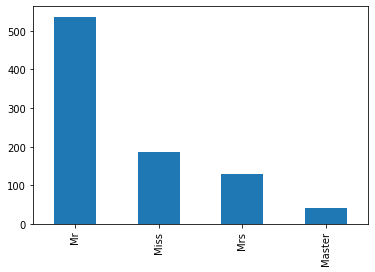

In [14]:
# Functions that returns the title from a name. All the name in the dataset has the format "Surname, Title. Name"
def get_title(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()
    else:
        return 'Unknown'

# A list with the all the different titles
titles = sorted(set([x for x in df.Name.map(lambda x: get_title(x))]))
print('Different titles found on the dataset:')
print(len(titles), ':', titles)
print()

# Normalize the titles, returning 'Mr', 'Master', 'Miss' or 'Mrs'
def replace_titles(x):
    title = x['Title']
    if title in ['Capt', 'Col', 'Don', 'Jonkheer', 'Major', 'Rev', 'Sir']:
        return 'Mr'
    elif title in ['the Countess', 'Mme', 'Lady']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']==0:
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title

# Lets create a new column for the titles
df['Title'] = df['Name'].map(lambda x: get_title(x))
# train.Title.value_counts()
# train.Title.value_counts().plot(kind='bar')

# And replace the titles, so the are normalized to 'Mr', 'Miss' and 'Mrs'
df['Title'] = df.apply(replace_titles, axis=1)

# Check that the number of Mr, Mrs and Miss are the same that 'male' and 'female'
print('Title column values. Males and females are the same that for the "Sex" column:')
print(df.Title.value_counts())

# Plot the result
df.Title.value_counts().plot(kind='bar')

In [15]:
# convert Title to numeric values
df['Title'] = df['Title'].map({"Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S,1,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S,0,0


In [17]:
# functions to check if family size is smaller than 4 or not
def IsLargeFunc(family):
    if(family>4):
        return 1
    else:
        return 0
    
def IsSmallFunc (family):
    if(family<=4):
        return 1
    else:
        return 0

In [18]:
df['isLargeFamily'] = df['Family'].apply(IsLargeFunc)
df['isSmallFamily'] = df['Family'].apply(IsSmallFunc)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Title,isLargeFamily,isSmallFamily
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1,1,2,0,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0,1,2,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0,0,0,0,1


In [20]:
print(df.isSmallFamily.value_counts())
print(df.isLargeFamily.value_counts())

1    844
0     47
Name: isSmallFamily, dtype: int64
0    844
1     47
Name: isLargeFamily, dtype: int64


In [22]:
# function to group passengers into male (0) ,female(1), child (3)
def male_female_child(passenger):
    # Take the Age and Sex
    age,sex = passenger
    # Compare the age, otherwise leave the sex
    if age < 16:
        return 2
    else:
        return sex

In [23]:
df['Person']= df[['Age','Sex']].apply(male_female_child, axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Title,isLargeFamily,isSmallFamily,Person
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0,1,0,0,1,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1,1,2,0,1,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0,0,1,0,1,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0,1,2,0,1,1.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0,0,0,0,1,0.0


In [24]:
print(df.Person.value_counts())

0.0    537
1.0    271
2.0     83
Name: Person, dtype: int64


In [25]:
# finding correlation of all columns to see which column has more influence on survival
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Title,isLargeFamily,isSmallFamily,Person
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.033212,-0.057527,-0.001652,0.012658,-0.030467,-0.040143,-0.033493,-0.042067,0.042067,-0.038279
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.069783,-0.035322,0.081629,0.257307,0.106811,0.016639,0.490000,-0.113984,0.113984,0.472637
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.331387,0.083081,0.018443,-0.549500,0.045702,0.065997,-0.079660,0.141167,-0.141167,-0.016018
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.084138,0.114631,0.245489,0.182333,0.116569,0.200988,0.645884,0.046629,-0.046629,0.722076
Age,0.033212,-0.069783,-0.331387,-0.084138,1.000000,-0.232630,-0.179156,0.091594,0.007372,-0.248498,-0.240171,-0.195872,0.195872,-0.440797
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.232630,1.000000,0.414838,0.159651,-0.059961,0.890712,0.329129,0.721698,-0.721698,0.342977
Parch,-0.001652,0.081629,0.018443,0.245489,-0.179156,0.414838,1.000000,0.216225,-0.078665,0.783111,0.404259,0.580022,-0.580022,0.413947
Fare,0.012658,0.257307,-0.549500,0.182333,0.091594,0.159651,0.216225,1.000000,0.062142,0.217138,0.148938,0.124240,-0.124240,0.136513
Embarked,-0.030467,0.106811,0.045702,0.116569,0.007372,-0.059961,-0.078665,0.062142,1.000000,-0.080281,0.038792,-0.055205,0.055205,0.075085
Family,-0.040143,0.016639,0.065997,0.200988,-0.248498,0.890712,0.783111,0.217138,-0.080281,1.000000,0.426909,0.783025,-0.783025,0.441214


we can see,survival is positively correlated to sex,fare,Embarked, family,isSmallFamily, Person and title

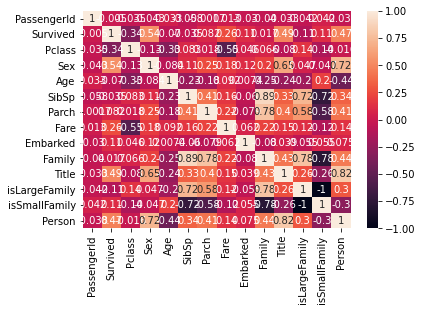

In [26]:
#showing correlation with heatmap
ax = sb.heatmap(df.corr(), annot=True)

In [27]:
# print list of unique values in 'pclass'
print("Unique values:", df['Pclass'].unique())

Unique values: [3 1 2]


In [28]:
# finding sum of people from each class
firstcount= 0
secondcount = 0
thirdcount = 0

for i in df['Pclass']:
    if(i==1):
        firstcount = firstcount +1
    if(i==2):
        secondcount = secondcount +1
    else :
        thirdcount = thirdcount+1
print('Total 1st class passengers:',firstcount)
print('Total 2nd class passengers:',secondcount)
print ('Total 3rd class passengers:',thirdcount)

Total 1st class passengers: 216
Total 2nd class passengers: 184
Total 3rd class passengers: 707


In [29]:
# finding all 1st class passengers who survived
firstclass = df.loc[ (df['Survived']==1)  & (df['Pclass'] == 1)]
print(firstclass.shape)
firstclass.head()

(136, 15)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Title,isLargeFamily,isSmallFamily,Person
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.00,1,0,71.2833,1,1,2,0,1,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.00,1,0,53.1000,0,1,2,0,1,1.0
11,12,1,1,"Bonnell, Miss. Elizabeth",1,58.00,0,0,26.5500,0,0,1,0,1,1.0
23,24,1,1,"Sloper, Mr. William Thompson",0,28.00,0,0,35.5000,0,0,0,0,1,0.0
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",1,29.69,1,0,146.5208,1,1,2,0,1,1.0


<AxesSubplot:ylabel='Frequency'>

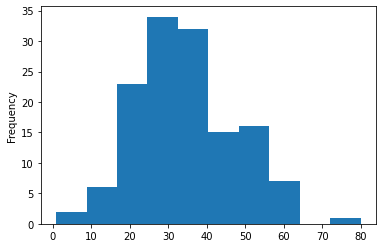

In [30]:
#age distribution of 1st class passengers who survived
firstclass['Age'].plot(kind='hist')

as observed above, most people who survived were in the age range of 30-40

In [31]:
# finding all 2nd class passengers who survived
secondclass = df.loc[ (df['Survived']==1)  & (df['Pclass'] == 2)]
print(secondclass.shape)
secondclass.head()

(87, 15)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Title,isLargeFamily,isSmallFamily,Person
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.00,1,0,30.0708,1,1,2,0,1,2.0
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",1,55.00,0,0,16.0000,0,0,2,0,1,1.0
17,18,1,2,"Williams, Mr. Charles Eugene",0,29.69,0,0,13.0000,0,0,0,0,1,0.0
21,22,1,2,"Beesley, Mr. Lawrence",0,34.00,0,0,13.0000,0,0,0,0,1,0.0
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",1,3.00,1,2,41.5792,1,3,1,0,1,2.0


<AxesSubplot:ylabel='Frequency'>

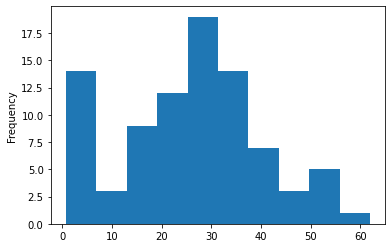

In [32]:
#age distribution of 2nd class passengers who survived
secondclass['Age'].plot(kind='hist')

as observed above, most people who survived were within the age range of 0-10 and 25-35

In [33]:
# finding all 3rd class passengers who survived
thirdclass = df.loc[ (df['Survived']==1)  & (df['Pclass'] == 3)]
print(thirdclass.shape)
thirdclass.head()

(119, 15)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Title,isLargeFamily,isSmallFamily,Person
2,3,1,3,"Heikkinen, Miss. Laina",1,26.00,0,0,7.9250,0,0,1,0,1,1.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.00,0,2,11.1333,0,2,2,0,1,1.0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",1,4.00,1,1,16.7000,0,2,1,0,1,2.0
19,20,1,3,"Masselmani, Mrs. Fatima",1,29.69,0,0,7.2250,1,0,2,0,1,1.0
22,23,1,3,"McGowan, Miss. Anna ""Annie""",1,15.00,0,0,8.0292,2,0,1,0,1,2.0


<AxesSubplot:ylabel='Frequency'>

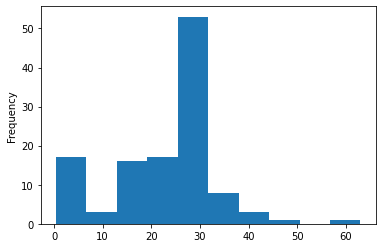

In [34]:
#age distribution of 3rd class passengers who survived
thirdclass['Age'].plot(kind='hist')

as can be observed above, most 3rd class people who survived were in the age range of 20-30

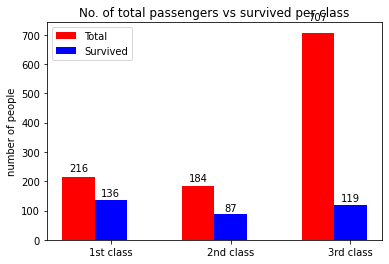

In [35]:
# plotting graph to represent number of people who survived in each class as opposed to the total number of passengers per class
N = 3
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = [216, 184, 707]
rects1 = ax.bar(ind, yvals, width, color='r')
zvals = [136,87,119]
rects2 = ax.bar(ind+width, zvals, width, color='b')


ax.set_ylabel('number of people')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('1st class', '2nd class', '3rd class') )
ax.legend( (rects1[0], rects2[0]), ('Total', 'Survived') )
plt.title('No. of total passengers vs survived per class')

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

Accoridng to the graph above, its interesting to note that only **16.8%** of 3rd class passengers survived as opposed to **63%** and **47%** of 1st and 2nd class respectively.

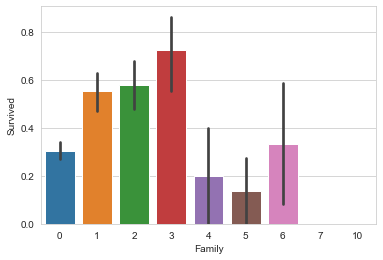

In [36]:
# Lets visualise the affect number of family members had on survival
sb.set_style('whitegrid')
sb.barplot(x='Family' , y='Survived' , data=df)
plt.show()

In the bargraph above we can see passengers with 3 members were most likely to survive while passengers with 4 or 5 were least likely.

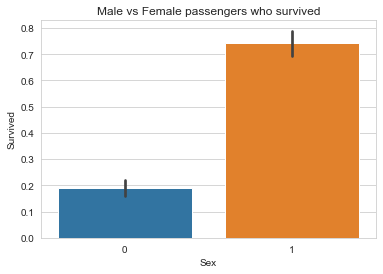

In [37]:
# Lets visualise the affect gender had on survival
sb.set_style('whitegrid')
ax = sb.barplot(x='Sex' , y='Survived' , data=df)
ax.set_title('Male vs Female passengers who survived')
plt.show()

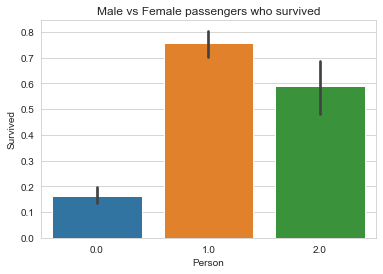

In [38]:
# Lets visualise the affect gender had on survival
sb.set_style('whitegrid')
ax = sb.barplot(x='Person' , y='Survived' , data=df)
ax.set_title('Male vs Female passengers who survived')
plt.show()

From the above graph we can see chances of survival of female is the highest followed by children and then males.

### Intuition
Based on the above EDA, its clear that factors that drive survival chances are Gender, Family, Fare ,Embarked, isSmallFamily, Person and Title. Lets keep them as features for our ML model to train on.

In [39]:
print(df.shape)
df.head()

(891, 15)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Title,isLargeFamily,isSmallFamily,Person
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0,1,0,0,1,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1,1,2,0,1,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0,0,1,0,1,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0,1,2,0,1,1.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0,0,0,0,1,0.0


In [40]:
#checking for null
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
Family           0
Title            0
isLargeFamily    0
isSmallFamily    0
Person           0
dtype: int64

# Lets train  ML models
We will test 3 models and compare which has the best performance. For a supervised classification task, best options are **SVM**, **Logistic Regression**, **Decision Tree** etc. 
  <p>The dataset is small.Hence, we will implement cross validation and check performance metrics. We will also implement gridsearch to check if it improves accuracy. Finaly we'll use the best performing model for prediction.

In [41]:
#importing necessary libraries
from sklearn.model_selection import KFold, cross_validate
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.linear_model import LogisticRegression


In [42]:
#loading training data (contains xtrain, y train)
Features = df[['Pclass','Sex','Fare','Family','Title', 'Embarked','isSmallFamily','Person']].values
Target = df['Survived'].values.reshape(-1)


### Performing k fold  cross validation where k = 10

In [43]:
kf =KFold(n_splits=10, shuffle=True, random_state=42)

count = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(Features, Target):
    print(f'Fold:{count}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    count += 1

Fold:1, Train set: 801, Test set:90
Fold:2, Train set: 802, Test set:89
Fold:3, Train set: 802, Test set:89
Fold:4, Train set: 802, Test set:89
Fold:5, Train set: 802, Test set:89
Fold:6, Train set: 802, Test set:89
Fold:7, Train set: 802, Test set:89
Fold:8, Train set: 802, Test set:89
Fold:9, Train set: 802, Test set:89
Fold:10, Train set: 802, Test set:89


## Implementing Decision Tree Model

In [44]:
# dictionary of some performance metrics
scoring = {'acc': 'accuracy',
           'F1_macro': 'f1_macro',
           'prec_macro': 'precision_macro',
           'rec_micro': 'recall_macro'}

#cross validation
model = DecisionTreeClassifier()
score = cross_validate(model,Features, Target, cv=kf, scoring=scoring )

#storing results of score in a dataframe
scoredf = pd.DataFrame(list(score.items()),columns = ['Metrics','score per fold']) 
meanscore = ["{:.4f}".format(score['fit_time'].mean()),
             "{:.4f}".format(score['score_time'].mean()),
             "{:.4f}".format(score['test_acc'].mean()),
             "{:.4f}".format(score['test_F1_macro'].mean()),
             "{:.4f}".format(score['test_prec_macro'].mean()),
             "{:.4f}".format(score['test_rec_micro'].mean()) ]

scoredf = scoredf.drop(['score per fold'], axis=1)
scoredf['mean score of all folds'] = meanscore
scoredf


,Metrics,mean score of all folds
0,fit_time,0.0023
1,score_time,0.0043
2,test_acc,0.8227
3,test_F1_macro,0.8055
4,test_prec_macro,0.8225
5,test_rec_micro,0.8019


### performing gridsearch and then cross validation again

In [45]:
# hyperparameters of decision tree
tree_param = {'criterion':['gini','entropy'],'max_depth':range(3,20)}
clf = GridSearchCV(model, tree_param, cv=kf)

score = cross_validate(clf,Features, Target, cv=kf, scoring=scoring )

gs_scoredf = pd.DataFrame(list(score.items()),columns = ['Metrics','score per fold']) 

meanscore = ["{:.4f}".format(score['fit_time'].mean()),
             "{:.4f}".format(score['score_time'].mean()),
             "{:.4f}".format(score['test_acc'].mean()),
             "{:.4f}".format(score['test_F1_macro'].mean()),
             "{:.4f}".format(score['test_prec_macro'].mean()),
             "{:.4f}".format(score['test_rec_micro'].mean()) ]

gs_scoredf = gs_scoredf.drop(['score per fold'], axis=1)
gs_scoredf['mean score of all folds'] = meanscore
gs_scoredf


,Metrics,mean score of all folds
0,fit_time,0.6614
1,score_time,0.0008
2,test_acc,0.8283
3,test_F1_macro,0.8116
4,test_prec_macro,0.8271
5,test_rec_micro,0.8072


* Gridsearch improved performance of Decision tree

## Implementing SVM

In [48]:
# dictionary of some performance metrics
scoring = {'acc': 'accuracy',
           'F1_macro': 'f1_macro',
           'prec_macro': 'precision_macro',
           'rec_micro': 'recall_macro'}

#cross validation
model = svm.SVC()
score = cross_validate(model,Features, Target, cv=kf, scoring=scoring )

#storing results of score in a dataframe
scoredf = pd.DataFrame(list(score.items()),columns = ['Metrics','score per fold']) 
meanscore = ["{:.4f}".format(score['fit_time'].mean()),
             "{:.4f}".format(score['score_time'].mean()),
             "{:.4f}".format(score['test_acc'].mean()),
             "{:.4f}".format(score['test_F1_macro'].mean()),
             "{:.4f}".format(score['test_prec_macro'].mean()),
             "{:.4f}".format(score['test_rec_micro'].mean()) ]

scoredf = scoredf.drop(['score per fold'], axis=1)
scoredf['mean score of all folds'] = meanscore
scoredf


,Metrics,mean score of all folds
0,fit_time,0.0294
1,score_time,0.0075
2,test_acc,0.6779
3,test_F1_macro,0.5905
4,test_prec_macro,0.6887
5,test_rec_micro,0.6053


In [49]:
# hyperparameters of svm
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

clf = GridSearchCV(model, param_grid, cv=kf)

score = cross_validate(clf,Features, Target, cv=kf, scoring=scoring )

In [50]:
gs_scoredf = pd.DataFrame(list(score.items()),columns = ['Metrics','score per fold']) 

meanscore = ["{:.4f}".format(score['fit_time'].mean()),
             "{:.4f}".format(score['score_time'].mean()),
             "{:.4f}".format(score['test_acc'].mean()),
             "{:.4f}".format(score['test_F1_macro'].mean()),
             "{:.4f}".format(score['test_prec_macro'].mean()),
             "{:.4f}".format(score['test_rec_micro'].mean()) ]

gs_scoredf = gs_scoredf.drop(['score per fold'], axis=1)
gs_scoredf['mean score of all folds'] = meanscore
gs_scoredf


,Metrics,mean score of all folds
0,fit_time,15.3761
1,score_time,0.0066
2,test_acc,0.8305
3,test_F1_macro,0.8174
4,test_prec_macro,0.8214
5,test_rec_micro,0.8165


* Gridsearch improved performance of SVM

## Implementing Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

# dictionary of some performance metrics
scoring = {'acc': 'accuracy',
           'F1_macro': 'f1_macro',
           'prec_macro': 'precision_macro',
           'rec_micro': 'recall_macro'}

#cross validation
model = RandomForestClassifier()
score = cross_validate(model,Features, Target, cv=kf, scoring=scoring )

#storing results of score in a dataframe
scoredf = pd.DataFrame(list(score.items()),columns = ['Metrics','score per fold']) 
meanscore = ["{:.4f}".format(score['fit_time'].mean()),
             "{:.4f}".format(score['score_time'].mean()),
             "{:.4f}".format(score['test_acc'].mean()),
             "{:.4f}".format(score['test_F1_macro'].mean()),
             "{:.4f}".format(score['test_prec_macro'].mean()),
             "{:.4f}".format(score['test_rec_micro'].mean()) ]

scoredf = scoredf.drop(['score per fold'], axis=1)
scoredf['mean score of all folds'] = meanscore
scoredf


,Metrics,mean score of all folds
0,fit_time,0.1509
1,score_time,0.0097
2,test_acc,0.8036
3,test_F1_macro,0.7873
4,test_prec_macro,0.7963
5,test_rec_micro,0.7873


performing gridsearch and then cross val again

In [47]:
# hyperparameters of random forest
param_grid = { 
    'n_estimators': [50, 100],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [4,6,8],
    'criterion' :['gini', 'entropy']
}


clf = GridSearchCV(model, param_grid, cv=kf)

score = cross_validate(clf,Features, Target, cv=kf, scoring=scoring )

gs_scoredf = pd.DataFrame(list(score.items()),columns = ['Metrics','score per fold']) 

meanscore = ["{:.4f}".format(score['fit_time'].mean()),
             "{:.4f}".format(score['score_time'].mean()),
             "{:.4f}".format(score['test_acc'].mean()),
             "{:.4f}".format(score['test_F1_macro'].mean()),
             "{:.4f}".format(score['test_prec_macro'].mean()),
             "{:.4f}".format(score['test_rec_micro'].mean()) ]

gs_scoredf = gs_scoredf.drop(['score per fold'], axis=1)
gs_scoredf['mean score of all folds'] = meanscore
gs_scoredf

,Metrics,mean score of all folds
0,fit_time,28.7225
1,score_time,0.0090
2,test_acc,0.8305
3,test_F1_macro,0.8143
4,test_prec_macro,0.8280
5,test_rec_micro,0.8099


### Intuition
<p> With the given results of the 3 models tested , it appears that **Random Forest**,with gridsearch, performed the best. Hence we will go ahead and fit the model to this classifier and then predict survival chances on test data

### Loading and processing test.csv for prediction

In [81]:
#loading the test csv file
test_data =pd.read_csv('test.csv')
shape= test_data.shape
print ('total rows:',shape[0], '\ntotal columns:', shape[1])
test_data.head()

total rows: 418 
total columns: 11


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [82]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [84]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [85]:
test_data['Age'] = np.where(test_data['Age'].isna() == True, 30.27, test_data['Age'])
test_data['Fare'] = np.where(test_data['Fare'].isna() == True, 35.63, test_data['Fare'])


### Processing test data

In [86]:
#need to map 'Sex' column to numerical values
test_data['Sex'] = test_data['Sex'].map({"male": 0, "female": 1})

In [87]:
print(test_data.Embarked.value_counts())

S    270
C    102
Q     46
Name: Embarked, dtype: int64


In [88]:
test_data['Embarked'] = np.where(test_data['Embarked'].isna() == True, 'S', test_data['Embarked'])

# convert Title to numeric values
test_data['Embarked'] = test_data['Embarked'].map({"S": 0, "C": 1, "Q": 2})

#dropping unnecessary columns and adding our aggregated ones
test_data['Family'] = test_data['SibSp'] + test_data['Parch']


Title column values. Males and females are the same that for the "Sex" column:
Mr        245
Miss       79
Mrs        72
Master     21
Dona        1
Name: Title, dtype: int64


<AxesSubplot:>

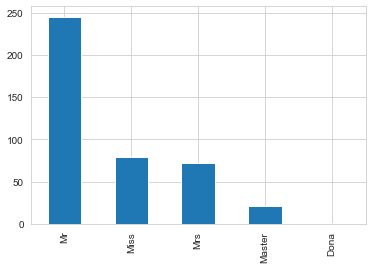

In [89]:
# Lets create a new column for the titles

test_data['Title'] = test_data['Name'].map(lambda x: get_title(x))

# And replace the titles, so the are normalized to 'Mr', 'Miss' and 'Mrs'
test_data['Title'] = test_data.apply(replace_titles, axis=1)

# Check that the number of Mr, Mrs and Miss are the same that 'male' and 'female'
print('Title column values. Males and females are the same that for the "Sex" column:')
print(test_data.Title.value_counts())

# Plot the result
test_data.Title.value_counts().plot(kind='bar')

In [90]:
# convert Title to numeric values
test_data['Title'] = test_data['Title'].map({"Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3, "Dona": 4})

In [91]:
test_data['isLargeFamily'] = test_data['Family'].apply(IsLargeFunc)
test_data['isSmallFamily'] = test_data['Family'].apply(IsSmallFunc)

In [92]:
#creating person feature
test_data['Person']= test_data[['Age','Sex']].apply(male_female_child, axis=1)

In [93]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Title,isLargeFamily,isSmallFamily,Person
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2,0,0,0,1,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0,1,2,0,1,1.0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2,0,0,0,1,0.0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0,0,0,0,1,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0,2,2,0,1,1.0


In [98]:
# dropping unnecessary columns
test=test_data.drop(['PassengerId','Name','Age','Cabin','Ticket','SibSp','Parch','isLargeFamily'],axis = 1)
test.head()

,Pclass,Sex,Fare,Embarked,Family,Title,isSmallFamily,Person
0,3,0,7.8292,2,0,0,1,0.0
1,3,1,7.0000,0,1,2,1,1.0
2,2,0,9.6875,2,0,0,1,0.0
3,3,0,8.6625,0,0,0,1,0.0
4,3,1,12.2875,0,2,2,1,1.0


In [99]:
#checking for null
test.isnull().sum()

Pclass           0
Sex              0
Fare             0
Embarked         0
Family           0
Title            0
isSmallFamily    0
Person           0
dtype: int64

In [101]:
#loading test data
X_test = test[['Pclass','Sex','Fare','Family','Title', 'Embarked','isSmallFamily','Person']].values


### Training with Random Forest

In [103]:
#gridsearch on randomforest classifier
model = RandomForestClassifier()
param_grid =  {'n_estimators': [100,200],
               'criterion':['gini','entropy'],
                                  'max_depth': [2,4,6,8],
                                  'max_features': ['auto','sqrt']
                               }
                                  
clf = GridSearchCV(model, param_grid = param_grid, cv =kf)
best_model = clf.fit(Features ,Target)

print(best_model.best_estimator_.get_params())
print(best_model.best_score_)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
0.8361423220973782


In [104]:
y_pred = best_model.best_estimator_.predict(X_test)

In [105]:
#saving results in a new array
result = np.concatenate( (test_data['PassengerId'].values.reshape(-1,1), y_pred.reshape(-1,1)), axis=1)

In [106]:
pd.DataFrame(result).to_csv("./Final.csv", header=["PassengerId", "Survived"], index=False)